<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

 
<center><h2 style="font-size:2em;color:#840700">   Caso de estudio: Ventas </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/ventas.jpg" align="left" style="width:400px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

## Integrantes

Nombre 1:

Nombre 2:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Ejercicio

Utilzar los archivos "datos/ventas/*.txt" para contestar las siguientes preguntas. A continuación el código propuesto para obtener el dataframe:

```python
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 
```

<div class="alert alert-success">
    
0. Explicar que hace el código de arriba
    
</div> 

1. Encentra todos los archivos `.txt` en la ruta `datos/Ventas`
2. Le cada archivo `.txt` y lo concatena en un sólo DataFrame llamado `df`
3. Elimina cualquier fila que contega valores nulos
4. Filtra las filas donde la columna `Quantity y Ordered` no es igual a `Quantity y Ordered`

In [2]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 

In [3]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.set_index('Order Date', inplace=True)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-10-28 10:56:00,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001"
2019-10-28 17:26:00,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001"
2019-10-24 17:20:00,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001"
2019-10-14 22:26:00,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001"
2019-10-07 16:10:00,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...
2019-04-08 17:11:00,194090,Google Phone,1,600.00,"177 Jackson St, Los Angeles, CA 90001"
2019-04-15 16:02:00,194091,AA Batteries (4-pack),1,3.84,"311 Forest St, Austin, TX 73301"
2019-04-28 14:36:00,194092,AAA Batteries (4-pack),2,2.99,"347 Sunset St, San Francisco, CA 94016"


In [6]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

<div class="alert alert-success">
    
1. Encuentre el número de productos que se adquirieron en Los Angeles, CA
    
</div> 

In [7]:
adds=[]
for i in range(len(df)):
  add =df['Purchase Address'][i].split(',')
  aux =add[2].split()
  add.pop(2)
  add = add + aux
  adds.append(add)
df['Street'] = [add[0] for add in adds]
df['City'] = [add[1] for add in adds]
df['State'] = [add[2] for add in adds]
df['Zip Code'] = [add[3] for add in adds]
df


/tmp/ipykernel_64689/362981894.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add =df['Purchase Address'][i].split(',')


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Street,City,State,Zip Code
Order Date,,,,,,,,,,
2019-10-28 10:56:00,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",379.99,609 Cherry St,Dallas,TX,75001
2019-10-28 17:26:00,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",389.99,225 5th St,Los Angeles,CA,90001
2019-10-24 17:20:00,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",5.98,967 12th St,New York City,NY,10001
2019-10-14 22:26:00,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",149.99,628 Jefferson St,New York City,NY,10001
2019-10-07 16:10:00,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",11.99,534 14th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
2019-04-08 17:11:00,194090,Google Phone,1,600.00,"177 Jackson St, Los Angeles, CA 90001",600.00,177 Jackson St,Los Angeles,CA,90001
2019-04-15 16:02:00,194091,AA Batteries (4-pack),1,3.84,"311 Forest St, Austin, TX 73301",3.84,311 Forest St,Austin,TX,73301
2019-04-28 14:36:00,194092,AAA Batteries (4-pack),2,2.99,"347 Sunset St, San Francisco, CA 94016",5.98,347 Sunset St,San Francisco,CA,94016


In [8]:
df.drop(columns=['Purchase Address'], inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Street,City,State,Zip Code
Order Date,,,,,,,,,
2019-10-28 10:56:00,259358,34in Ultrawide Monitor,1,379.99,379.99,609 Cherry St,Dallas,TX,75001
2019-10-28 17:26:00,259359,27in 4K Gaming Monitor,1,389.99,389.99,225 5th St,Los Angeles,CA,90001
2019-10-24 17:20:00,259360,AAA Batteries (4-pack),2,2.99,5.98,967 12th St,New York City,NY,10001
2019-10-14 22:26:00,259361,27in FHD Monitor,1,149.99,149.99,628 Jefferson St,New York City,NY,10001
2019-10-07 16:10:00,259362,Wired Headphones,1,11.99,11.99,534 14th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...
2019-04-08 17:11:00,194090,Google Phone,1,600.00,600.00,177 Jackson St,Los Angeles,CA,90001
2019-04-15 16:02:00,194091,AA Batteries (4-pack),1,3.84,3.84,311 Forest St,Austin,TX,73301
2019-04-28 14:36:00,194092,AAA Batteries (4-pack),2,2.99,5.98,347 Sunset St,San Francisco,CA,94016


In [9]:
df['City'].value_counts()

City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64

In [10]:
df[df['City']==' Los Angeles']['Quantity Ordered'].sum()  

np.int64(33289)

<div class="alert alert-success">
    
2. ¿Cuántos iPhone se vendieron?

    
</div> 

In [11]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [12]:
df[df['Product']=='iPhone']['Quantity Ordered'].sum()

np.int64(6849)

<div class="alert alert-success">
    
3. ¿Cuánto fue su ganancia por venta de baterías? 
    
</div> 

In [86]:
df[df['Product'].isin(['AAA Batteries (4-pack)','AA Batteries (4-pack)'])]['Sales'].sum()

np.float64(198859.23)

<div class="alert alert-success">
    
4. ¿Cuál fue el código postal que más ordenes realizó?

    
</div> 

<Axes: xlabel='Zip Code'>

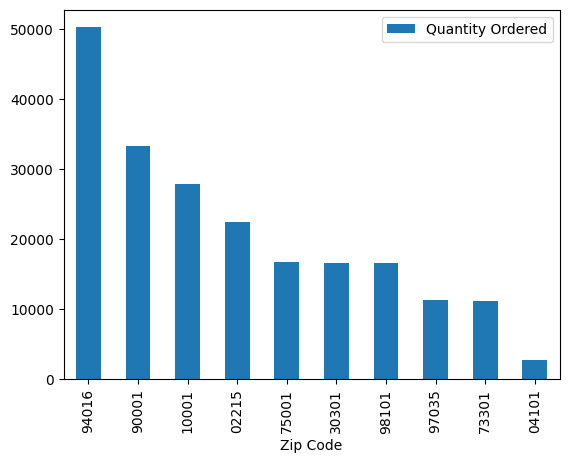

In [84]:
df.groupby('Zip Code')[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered',ascending=False).plot(kind='bar',y='Quantity Ordered')

<div class="alert alert-success">
    
5.  a) ¿Cuál fue el producto con más ganancias?
    
    b) ¿Cuál fue el producto con más unidades vendidas?

    
</div> 

<Axes: xlabel='Product'>

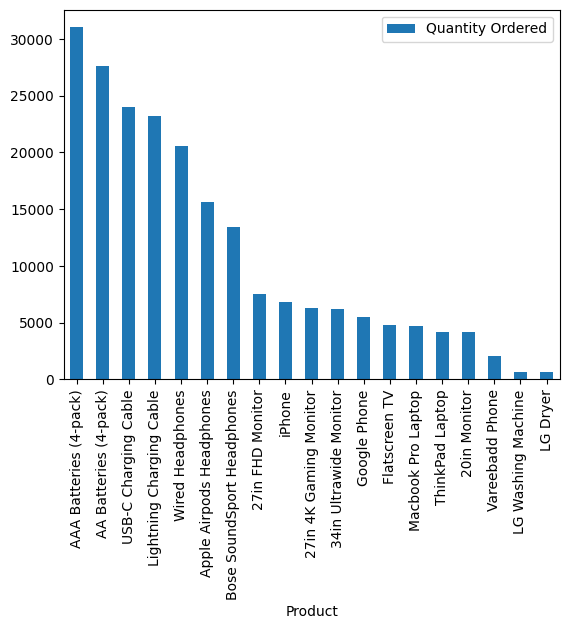

In [80]:
df.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered',ascending=False).plot(kind='bar',y='Quantity Ordered')

<Axes: xlabel='Product'>

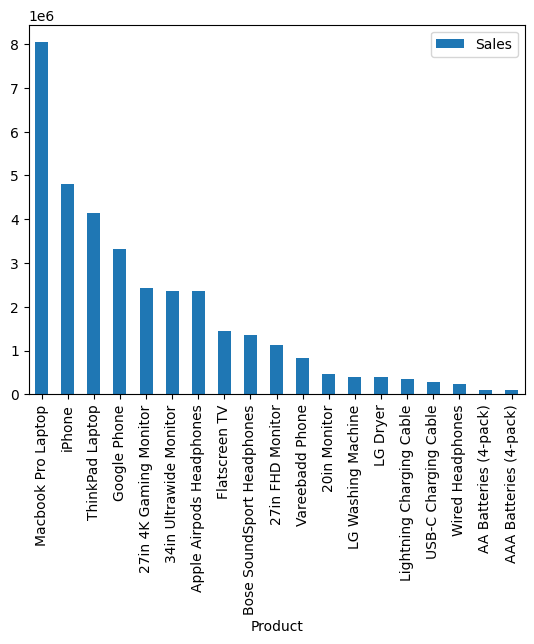

In [81]:
df.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Sales',ascending=False).plot(kind='bar',y='Sales')

<div class="alert alert-success">
    
6. ¿Cuales son los 5 productos más vendidos?     
</div> 

<Axes: xlabel='Product'>

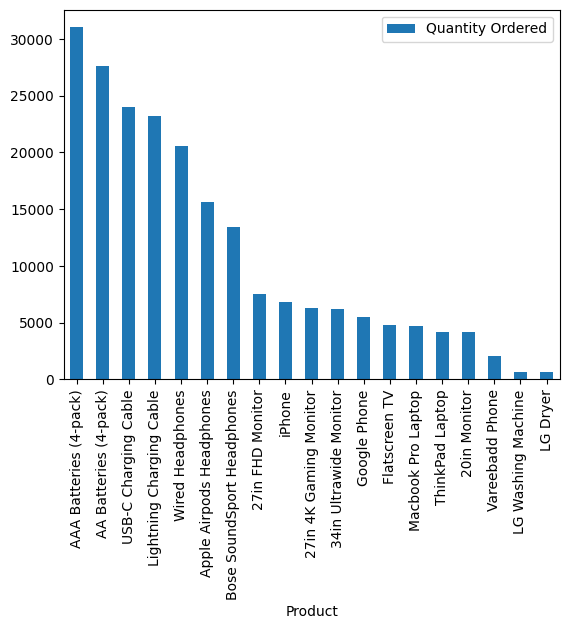

In [79]:
df.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered',ascending=False).plot(kind='bar',y='Quantity Ordered')

<div class="alert alert-success">
    
7.  ¿Cuales son los 5 productos con las ganancias más altas?

    
</div> 

<Axes: xlabel='Product'>

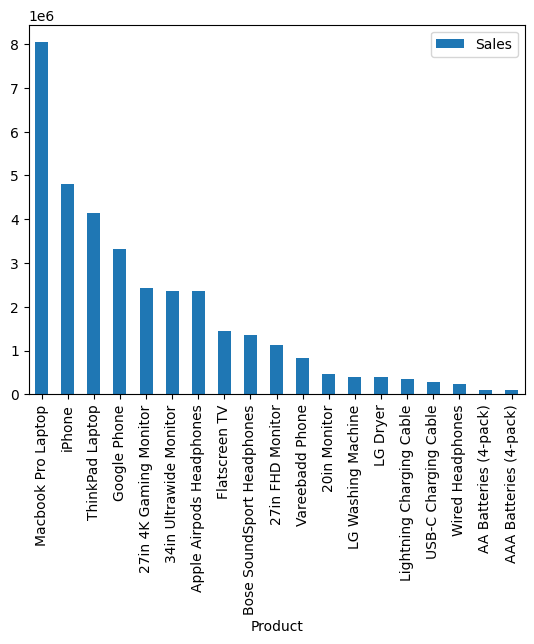

In [78]:
df.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Sales',ascending=False).plot(kind='bar',y='Sales')



<div class="alert alert-success">
    
8. ¿A qué hora recomendaría mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?     
</div> 

<Axes: xlabel='Order Date'>

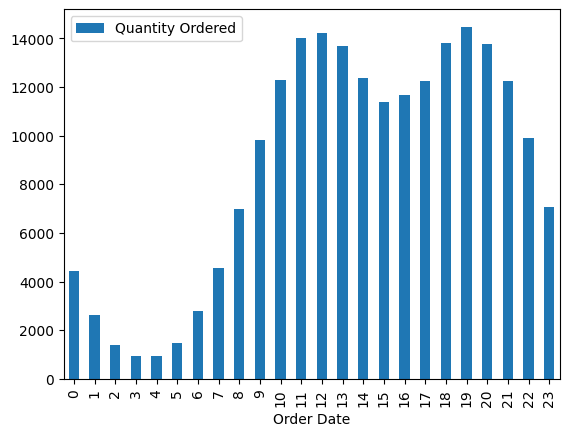

In [66]:
df.groupby(df.index.hour)[['Quantity Ordered']].sum().plot(kind='bar')

<div class="alert alert-success">
     9.   a) ¿Cuál es el día de más ganancias por cada mes?     b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
    
</div> 

<Axes: xlabel='Order Date'>

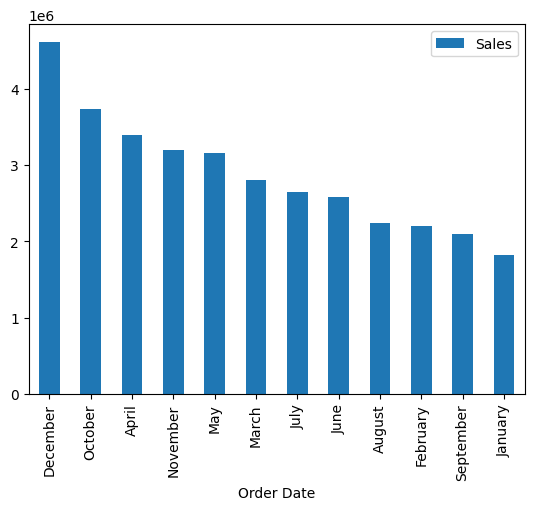

In [77]:
df.groupby(df.index.month_name())[['Sales']].sum().sort_values(by='Sales',ascending=False).plot(kind='bar')

<div class="alert alert-success">
    
10. ¿Cuál fue el producto más comprado en San Francisco, CA?
    
</div> 

<Axes: xlabel='Product'>

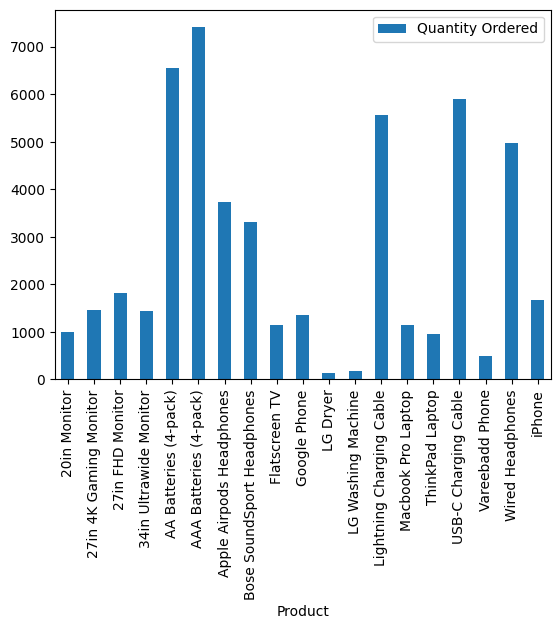

In [73]:
df[df['City']==' San Francisco'].groupby('Product')[['Quantity Ordered']].sum().plot(kind='bar')

<div class="alert alert-success">
    
11. Escribir una conclusión del ejercicio (ventajas de usar pandas, herramientas mas utilizadas en este ejercicio, etc). 
    
</div> 